In [5]:
## This file is an implementaion of the pd controller class
## Author : Avadesh Meduri
## Date : 22/06/2020

import numpy
%run double_integrator.ipynb #imports OneDOFMan
%run one_dof_manipulator.ipynb #imports OneDOFMan
%run two_dof_manipulator.ipynb #imports TwoDOFMan

In [6]:
class PDController:
    
    def __init__(self, p_gain, d_gain):
        '''
        Input:
            p_gain : proportional gain
            d_gain : derivative gain
        '''
        self.p_gain = p_gain
        self.d_gain = d_gain
    
    def compute_torque(self, joint_position, joint_velocity, des_joint_position, des_joint_velocity):
        '''
        This function computes the desired torque for each joint to track the
        desired joint position and velocity
        Input:
            joint_position : joint position at the given time step
            joint_velocity : joint velocity at the given time step
            des_joint_position : desired joint position at the given time step
            des_joint_velocity : desired joint velocity at the given time step
        '''
         
        proportional_error = des_joint_position - joint_position
        derivative_error = des_joint_velocity - joint_velocity
        
        torque = self.p_gain*proportional_error + self.d_gain*derivative_error
        
        return torque


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA18W1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA8FZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4He8+CbP+oDHBaQz11BEy0Z4QFNB94aop
l/7S6UyfIxqJCFgAABTxFpAEj+YURv7G58QAGA9vCGfULmCtkBBrdrXzLlWfxwN1GxYHZD9+kcNS
7rW/EizsJdz2mpTKsgPuwXbFhwVYCF3dzKLxSg8UELznh1p2PYS4EoKGZOyLb8pd7GbOAYa61Knn
rUm94LlF/iTxYfE62+YQtzAZxbBdhBB5+T49yyJjbfFzUqrtGOr/Sq0LNUlFFhVFkyqBJbarDs+S
wgj58jP6SnY4A13Z7ZDPVPMpbHYvN1ORBCMv/WqUP9FX++BAsyZo0j1DR8FOn20y2r9RPbmHYC8q
XHh1Mvsff7fcz7o6oYY+OcPDpWgFjC6fLge2uASlK1UeTUoyPjAcoTLA+ljdvXHIVlj1mAup2/bp
/ea7/9BOyzXIfb9qR08mmHWAMLeU8uv/YmCaOwcGJldmUm53kzhzo6XbF1p052Ndba0rbqI55t7e
7abwxjiZbT8CskluJB+PiZQXMJ6H8xRuLqeqdw3QCZoP4Ln+Wtr8AiVxT1EmJGo40d/8xAiJIOvN
KqiN8neSFVujNhyKBWPd5Z/fnvWHUGbhYieiWsh/Jd3dp97IjApk9vS4CQorRTq16trmYwxU5pyF
Qn6xtmi3eEaV6lEYZD3/3JPh/lIMy7ItAhwSkZ0xNLysR8vjoep4NQjrlRXt2w7wt8D/2fMBiX2L
SEbKct6RyShdn244Nx/LIELiQ9dN5eeCkuYhzEgZrichflANtDucX3nzy1qcV3vpYpbrNguCrxdl
MWzn0C1ctu9DuuLKgkVNeEP7GZbPVCCRSxGPU5e2h2c+25avQ3kEh5vqKdDHfRyxBieXftYKKCC+
O4N/Ftci7vI8zzB/tVZGghEaHemII+TtK0zpEhzCqD24/f92/K9Vf5B4e+v4ws4iNpMGFkw0JjnB
wP4+DE516soS40lBlZk9yVQ3IxTULlB9rDgP66UVl51WVXzrAqzsLpxR2FAmOuezHHrud5998/NG
Xh/CCexX01nBg4qLxKxPP6+vQ82TPLLGaladglQTRcG/Qg0q2Reu3heMw22aNclpluY3+w6q8gp+
a0T9zWchA4PsO7bGVjQYFb0dQdSonhR0uCt9lPr1quyUz2MxXKItpd3wipYoxiQREY7TD/PNwysM
8xnUKwuLda+oR8ysNqX0oJoDpRgdy2jgqbU4n/fKJ2I+N6A/t9xx4b+B81uVYXdslowJg1hOF8b9
vp91AjvIV+oyGY9ZFiaGf27AMllUZltiFRGzRC27B4sx+ssdYbjqm8zbynimxbr0zVg88Sr8rVpY
7+k1RbJbhJlcoSvFBb/5GrBCG0bSKiIUiY98QGkL7qxLmfpDLZdX5I20rsGw0t+Cz1CgEzASmTfg
o7IFC6cxSouR8Ti8RBK+A/o1aagY0sc2hYoPTSu0VxxOLDBG3Cgm4l/pIauvYgQDjYYTMfyys8HA
17PIO9SMgXEIWDe3Umg3YqS/M9Pf+GKRMTUmk8n8vWiox/FgqLIYTFnVq94AlQFM/enDo1iR9Nwm
/UYYImW4Irxl8iaJVG0kzbNigTyhcoeCY7zqEi6Xvuxd8TnNHvF/e4R2ZdwU92ohv/LCKcdif2u3
chc3x3w7FtHoxCRKKBrMWg5gsJuv23G9F27bXGCGp8KDzRpHiTQO40vY9qOJmgY3NIzqzGr3llN5
Qy583v6A73VgVfP6LkxguFt/0H1ObntIlVKPNbGk26xACzQMDOGv/CwJ3c9vF53HQ6vZ/Rvy269i
tpqZuL/Pw4KKbxu5QUBkyjQmavw2xWO7rRiWH+vn11naq73FlhXlgx1bw5ss5eLtI6X6Jl+dWxB3
sSS1UGZyZUi6BaB7kDouM+3y8ua3JIsem+99b3j35StY/TijWwJJQU4sDB4np1ojz+JIswmJrzKN
uXlEDWhxlIddyGKd/wri9fO/MkjyJFjgxzcGYtjnXFULn6ahzpJP1hWOoTW2ef6Ixr55a3LEkG80
fZ/TwH99x6oZ4i4yIG/CJ9gG20cTtVQc9PBS5lTVaMcYZB7pDxr+oRcrY3m/RE8A2gf6FVpkbBKk
b41u1QPjtrW5sg3ZKpQzpIqUmQFQpEQT7Y8zVfAK/jRpte29YAba0E00EOxHKSPZQ2mykzeCA2lu
GetnAWZXc8jCbc4ua8CNNcntWcZ1HctkaQoj32fFBD3NLppp0eEnbcc9fUxsDupRKMDis5gWO203
Ow6Yu9LnW2rCN7rhxwNTP/0nfrdwqVfkLO5yWcxLO4oHXsESHrsekgLYiAzofleFUqR7IPKpT4+g
xeCbQ3EBbXeEkWhR+0URzcY/ka8plcf6m+sw093OJqRqaVFuBPCEI5JTO00Wia6Sxpy9T148U0ar
13o2X6Nu11bi5kBD16TikYkfwSv66l35deqOKwoZgx3l/l7VJz3VfuAyQpIpRdNsywnJuHjr8Sag
be6y3mWlVSnSvFp2/62WxNnUtvzJYIEUQO/6r+6E1DSlEtQYVMceDxU/n2POgcHWH+Uw4WIsCdy+
qr1MG5IPKDcYkhNMPqwIse+7pd4sXJ+KvuRwFxVH3eWt5jvx5V4DcvSnV8M2jY8kk/eDkYd98qlf
Am1VO1Kt4dpIZ216/h4cRZ4xbjpR9pBg9kf5hEumhvsQpL619x/QAACv8Ox02qMFT3X9j9nUAU8G
3vuuNWX23UugV0yhXGgIrO/abW0ukGpG3erN+qEfaITia3YAhPOYGFrT8gQvE8/YEKEwOF8UTIs7
SXgBp9K/lrQuctaD/ck1UxMRDs5nDqIJ9KAHxL3YwDH1jOR4ic7c8TKijuwOQvzxEaDjm0fDTvWd
FQJy9D6PN3v7kFQ6zKlaK

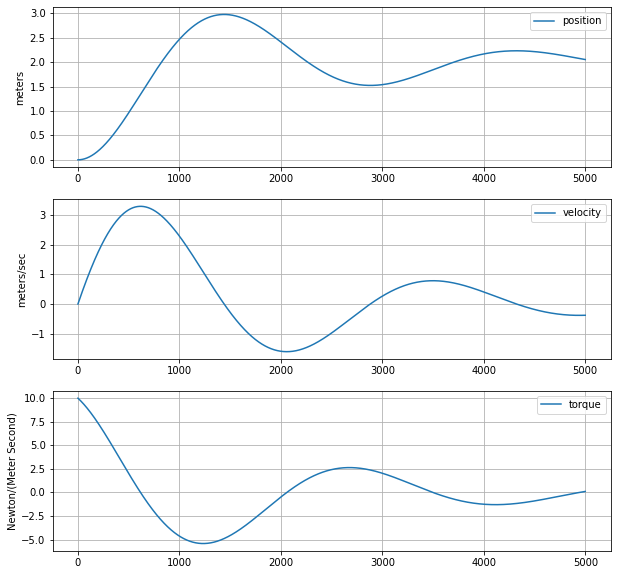

In [7]:
env = DoubleIntegrator(1, 1)
pd_ctrl = PDController(5, 1)

horizon = 5000
des_position = 2
des_velocity = 0

env.reset_double_integrator(0, 0)

for t in range(horizon):
    position = env.get_position()
    velocity = env.get_velocity()
    f = pd_ctrl.compute_torque(position, velocity, des_position, des_velocity)
    env.step_double_integrator(f)
    
env.animate()
env.plot()

In [9]:
env = OneDOFManipulatorEnv(1, 1)
pd_ctrl = PDController(5, 1)

horizon = 10000 # duration of simulation steps
des_joint_position = 60
des_joint_velocity = 0

env.reset_manipulator(0,0)

for t in range(horizon):
    # obtaining current joint position and velocity
    joint_position = env.get_joint_position()
    joint_velocity = env.get_joint_velocity()
    
    torque = pd_ctrl.compute_torque(joint_position, joint_velocity, des_joint_position, des_joint_velocity)
    env.step_manipulator(torque, True)

env.animate()
env.plot()

NameError: name 'OneDOFManipulatorEnv' is not defined

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABnkG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA8ZZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVayF8Emf9QKWkkEH2GTljfWpRuMbrZg76
NcdJ/n8ziu5sWK/KZAAAC5fg7naccdQiJ/wxKxdx+cO3kmdkRj7vyWMF0/OreWfWkc+mULUYfyK5
eqvrcOU+PsIuJnKI5lbQbjdwJpHjnpLhLVdJajNi3naFcFciwjzoe+dOF967y8xqBY2Go/1wt79a
ZB/Yp7VhQEUGiL0KCrHu7kSjMRE6pFzsSa0busVo8OtZd9zx+ivY1ur1xjuq46NWunf58q11cRPK
4kBXCkWYCl9ZLIchEKWvgfrnPF3msArWGlyVZ+SciW4Zlhdmi2WmNLkxvzOSj9wGZjS2bp0BT4ej
TmKe7mkYiNj+p+FtmLgbQDChOymmRaoYiUINilIY6IRA5vp426ojlj2sBlm532r7u4Oae3/+mOPx
sqm6aeVrcwlnSi5SPBgFAntRzk7ZuCw/Kg0SxF/gZU7sFEz+bwib37Fk8u8kK5ZwTjypOvjfPvGR
SRs4SAi9VXJWbH7Czlpvmn3JOxra4E3/sgrFfA+aFfmNHwcRtvZyAO1V4vKyJTb2BArXdI3+7CFD
WLhxt3T+Bx8OokVxrf3urmr0516SnqmZ3HPPEKCewi1IAQwn8p8YIztECFemzh829VEJWwIjUaTL
xIhCgB/54pa4QJ7n3Uvca3eeJ26QJLKlVJvU4UkUQCWA8Y2GIICMhRLTsFaFcf850gM2pHfJsHE5
9j1y63kOeT6FA6LU7d3yQk2tDrpsTKtwzxlot+4H8gYsS5b4AbDU1g99hOU7eSVIs+O0jPuu/uDL
X+TPv1HZaiEUqjbdxq5KJ1F4xQofnxI13XYMIYWX2jQv3RTH6DDCoBQaMffRcDqeq59URMcnK5VZ
pfI5OexyBOBmilpXnKNQyCfNKiMQtL5oK5v3yXBmaUUEMPK8iM2eEcn8gmr00sqBa+PxYFpf/85o
Y5sQoM5MM9oJSMYDfFHBAM7sXaxuckvUtfrVgvpDFa7sOlJ7h5k6O5Jss38oGfbMVdQgp0yBUgYW
yR5Q7P3VoABN/H/j4GJCfOJFpv3ieYy1M1i8Ge7CT+jtwRKXOOLAvs80p9NFM50NUZ6f9HiWcTpc
GiPSWskB1fzZSs3baLDcXS3qXCD6459S8tXR11neRrfrLlu3zujugMmW+m3+zT/2p7aVKjFt2cE2
UMsIwu//i7DsAgH8iJ1ghb7QN/tV93Zj9Z5gqcnJ/AaRZA2WAL65vPiZ6Sko/twR5fXEY3O/c0vO
Fc2h6nrvjV6cb3k5Q/Z4gwvaUMzqhHnxyFBrSMKkX4kO4rAp55E5z1PxPzsOR5Nz7YKc1insXDvu
WSVNocsLW/yeh8CEdjzToGcpRKSmBPq3KY3NRHHxh7tOyx6gHgiFiC1DzCxaOjzDtqiaRtVlfNzC
XmG/UVOEXIwH7SEgIxuiqPy0JoRZ2dMg9maVBKxbaQrvuR0ZuRp8R8AhYjRamhQYNFRqzNUYuwk7
1VyiUw5P2CrQhFL2n581C081oPX4yDmCuRgvJ5bK7DdR8BKsvuKnMtiCDgbCDHBM6M3EsIKE4PHS
XcMtIstQiQIobwSYWBRVFTgLLNStlLjfHA+9y+apbfc4rtbovWteWWuK+vWMwxPh0AiHq1SBt3oQ
q+nLSZNhUJpfLbtvG1xwsiA8hmwSdHfguVTp8YWK82zG6nlhtnN+M7wlPzBbZljs7mNCWpQMsit0
O0MeEBDT7+kd6muw8c8cLojYuieF9+jSlmueccQlw5/IFVUzOCedX8SdrGY1mIJ02SC8kJpFSNBT
S1Y95CZLqQf/7pS+yX+2wYVhiy2IqdA2VYO3BwP6pCkOtH1819o0rKuf8E6oWJqwaOAmg9KW9DHE
dJSfHl/PwzIK60MZxM409dR/eT3HayYgEdUNZ2KvNAFOUXoDBLLW6fuHM2SuakJU19uW7JgmPuEb
HPSBeIH7zO3/MzdiYgPEMbponMa4TZCaNNF6uLAI5XJp56m0FusCGXmbizHByuV+1dP9NGq6JSHm
1lJpH+vGjwPCek9AGQJvbPd33M5dznIlfrWRSVZXF5g8MxEdm9IEJj4PlKpBgJI0OkUBaECQbjLx
kscc6AXTZlvBChTQLC1xghc5duLW4g6NRdLSf4zloXq7YPq4yVxl1ev3rgMuvmPNoVhlW9hUbOSK
hFgwMl4S4H6eHbC3xwC/lfe0IsMFzDP/Pdv57UtfVDBqWsahkJ+FLiD69n/gK/yf58zEe9IMWGWt
PzxWDjVgvebd4QI6TWKbysqMpx4ZrONoQc6dyrU0zftkJTXosJPYradldojpjlIDWprjLH0d/+0L
cbWStaMV4f75BT9nbmkruSJdKQCdlrnkcEizkzPtL2GXy8OTYPeb3gEUvPS7os1HDVwaqbfTqkTG
8fcB7gPL7yuCjVhFRmTkil4nBnT3fpKL/w/sg0Ooo5r5WK3sTa20PIs17ntplidbBqmNCoqyxAgg
BrCzX/FUrGykLrTMB2SLaiQTskvPxA8JrZJ1mBtpwyaoqhpvEffxadDjHvgSgq4FP3xepbGNkosf
C2Q9eJq50/vltB/xAZjDpd0U1d5NefDQW+3MQQGoZd75CrpdeM+NQpsHBh5gi+7fDfmoK3RgqWyA
Jv4GwKlehPgL+l3nlnYYwhpq7jYf0upOkwUZOQi+3Xm9ZisRdnHvMo9apYU6mXgLND1ArUiSLSS/
jZDui34pvSfHX7o6h9BK7gxHjHgm3Gj0KF20+EeI/sKxiEGPot1dK66Bgjx6Efbwq5RNrwAMpQiW
2/m4HUWX2Khs+yP5shRqZ8lW5QaT2tfZ6gTAItLpLk4975j/aYYWVey5CFbMMZbrM0Tv9SKu4Bna
jCJZWF7hfnV8PCIdUwld0

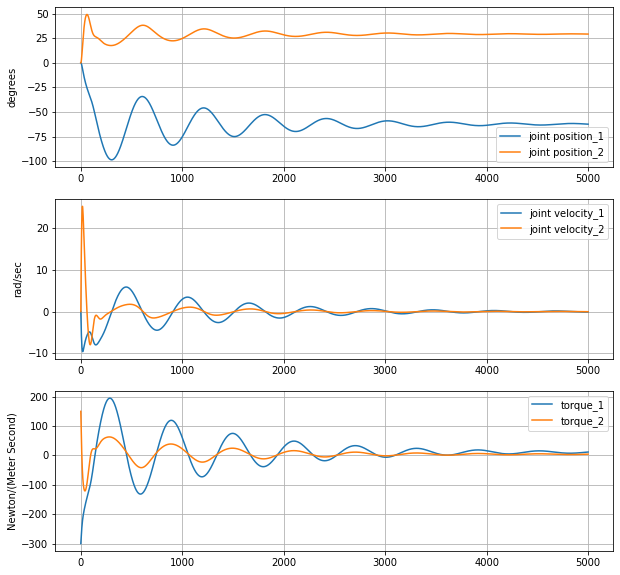

In [8]:
pd_ctrl = PDController(5, 5)
env = TwoDOFManipulator(1, 1, 1, 1)

des_th1 = -60
des_th2 = 30

des_thd1 = 0
des_thd2 = 0

env.reset_manipulator(0 ,0, 0, 0)
horizon = 5000 # duration of simulation steps


for t in range(horizon):
    th1_t, th2_t = env.get_joint_position()
    thd1_t, thd2_t = env.get_joint_velocity()
    
    tau1 = pd_ctrl.compute_torque(th1_t, thd1_t, des_th1, des_thd1)
    tau2 = pd_ctrl.compute_torque(th2_t, thd2_t, des_th2, des_thd2)
    
    env.step_manipulator(tau1, tau2)

env.animate()
env.plot()

### Possible questions

1. Implement PD Controller after reading theory using the PDController skeleton 
2. Use PD controller to understand gain tuning (importance of d gain damping) (for both robot env)
3. implement trajectory generator in joint space and track
4. implement trajectory in task space and combine with inverse kinematics